In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as Fn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, in_features=2, hidden1=4, hidden2=3, out_features=1):
        super().__init__()
        self.Layer_1 = nn.Linear(in_features, hidden1)
        self.Layer_2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = Fn.relu(self.Layer_1(x))
        x = Fn.relu(self.Layer_2(x))
        x = torch.sigmoid(self.out(x))

        return x

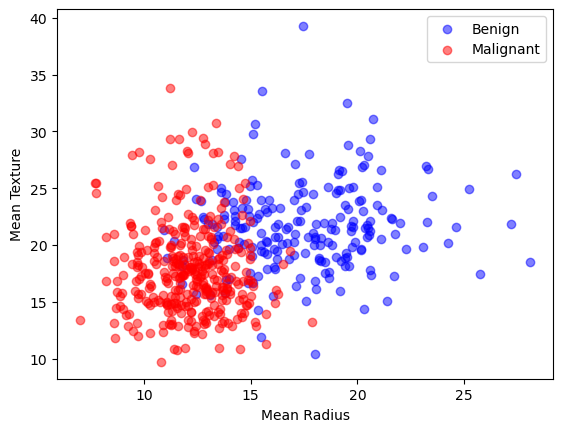

Epoch: 0 | Loss: 1.098370909690857 | Test Loss: 0.8070140480995178 | Test Accuracy: 0.36
Epoch: 1 | Loss: 0.8186807036399841 | Test Loss: 0.6988300681114197 | Test Accuracy: 0.36
Epoch: 2 | Loss: 0.7076149582862854 | Test Loss: 0.6612598896026611 | Test Accuracy: 0.63
Epoch: 3 | Loss: 0.6683592200279236 | Test Loss: 0.6486804485321045 | Test Accuracy: 0.84
Epoch: 4 | Loss: 0.6546769738197327 | Test Loss: 0.6444418430328369 | Test Accuracy: 0.65
Epoch: 5 | Loss: 0.6496250629425049 | Test Loss: 0.6429993510246277 | Test Accuracy: 0.65
Epoch: 6 | Loss: 0.6475232243537903 | Test Loss: 0.6424043774604797 | Test Accuracy: 0.64
Epoch: 7 | Loss: 0.6464507579803467 | Test Loss: 0.6420886516571045 | Test Accuracy: 0.64
Epoch: 8 | Loss: 0.6457086801528931 | Test Loss: 0.6418846249580383 | Test Accuracy: 0.64
Epoch: 9 | Loss: 0.6450851559638977 | Test Loss: 0.6416900157928467 | Test Accuracy: 0.64
Epoch: 10 | Loss: 0.6445056796073914 | Test Loss: 0.641463041305542 | Test Accuracy: 0.64
Epoch: 11 |

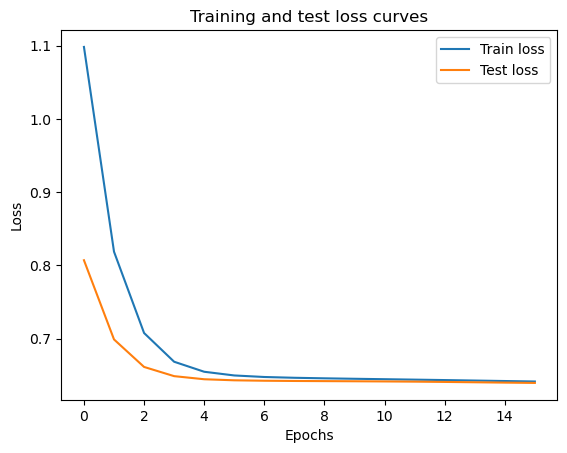

In [19]:
model = Model()

data = load_breast_cancer()
X, y = data.data, data.target

X_selected = X[:, [0, 1]]

plt.scatter(X_selected[y == 0, 0], X_selected[y == 0, 1], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_selected[y == 1, 0], X_selected[y == 1, 1], color='red', label='Malignant', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

#Linear model can't work with this data

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

torch.manual_seed(42)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 16
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss.item())

    epoch_count.append(epoch)
    y_preds_bin = (test_preds > 0.5).float()

    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()} | Test Accuracy: {accuracy_score(y_test, y_preds_bin):.2f}")

plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()